# Исследование данных  Телеком
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### Шаг 1. Чтение файлов с данными и изучение общей информаций. 

In [69]:
#Импорт библиотек обработки данных и линейной алгебры
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
# Ввод данных в датафрейм пандас

contract = pd.read_csv(r"C:\Users\Asus\Documents\Python Scripts\Яндекс практикум\Выпусконой проект\data\contract.csv")

internet = pd.read_csv(r"C:\Users\Asus\Documents\Python Scripts\Яндекс практикум\Выпусконой проект\data\internet.csv")

personal = pd.read_csv(r"C:\Users\Asus\Documents\Python Scripts\Яндекс практикум\Выпусконой проект\data\personal.csv")

phone = pd.read_csv(r"C:\Users\Asus\Documents\Python Scripts\Яндекс практикум\Выпусконой проект\data\phone.csv")

#Назначение атрибут имия датафрэеймов
contract.name = 'contract'
internet.name = 'internet'
personal.name = 'personal'
phone.name = 'phone'


NameError: name 'pd' is not defined

In [2]:
# Функция раскрытия информаций датафрэймов
def info_df(df):
    print('Название датафрэйм :', df.name)
    print ("Кол-во наблюдений     : " ,df.shape[0])
    print ("Кол-во признаков : " ,df.shape[1])
    print ("\n Список признаков : \n" ,df.columns.tolist())
    print ("\n Пропущеный наблюдений :  ", df.isnull().sum().values.sum())
    print ("\n Уникальные наблюдений :  \n",df.nunique())
    print("\n")
    print( df.info())
    print("\n")
    print(df.sample(5))


In [72]:
# Информация контракта
info_df(contract)

Название датафрэйм : contract
Кол-во наблюдений     :  7043
Кол-во признаков :  8

 Список признаков : 
 ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

 Пропущеный наблюдений :   0

 Уникальные наблюдений :  
 customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


      c

In [73]:
# Информация контракта
info_df(personal)

Название датафрэйм : personal
Кол-во наблюдений     :  7043
Кол-во признаков :  5

 Список признаков : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']

 Пропущеный наблюдений :   0

 Уникальные наблюдений :  
 customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


      customerID  gender  SeniorCitizen Partner Dependents
6124  7153-CHRBV  Female              0     Yes        Yes
6855  8738-JOKAR  Female              0      No         No
1918  2801-NISEI    Male              0      No         No
2153  7978-DKUQH  Female              0     Yes       

In [74]:
info_df(internet)

Название датафрэйм : internet
Кол-во наблюдений     :  5517
Кол-во признаков :  8

 Список признаков : 
 ['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

 Пропущеный наблюдений :   0

 Уникальные наблюдений :  
 customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB
None


 

In [75]:
info_df(phone)

Название датафрэйм : phone
Кол-во наблюдений     :  6361
Кол-во признаков :  2

 Список признаков : 
 ['customerID', 'MultipleLines']

 Пропущеный наблюдений :   0

 Уникальные наблюдений :  
 customerID       6361
MultipleLines       2
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB
None


      customerID MultipleLines
6143  8450-JOVAH           Yes
3007  9122-UMROB            No
4367  0988-AADSA           Yes
4481  4298-OYIFC           Yes
3094  0744-GKNGE           Yes


## Вывод

При первычном расмотрение можно отметить что необходимо привести тип данныхв нжную для оработки и построение модели.
Нужно отметить что количество наблюдений в файле "personal" и "contract" одинаковые  -  7043,что наводит на мысль что у каждого клиента хотя бы один контракт заключен, так же количество набдюдений в файле "internet " - 5517  и колличество набдюдений в файле "phone" -6361 


In [76]:
# Проверка наличий значение Nan и дубликатов
def duplicate_nan(df):
    nan = df.isna().sum()
    dup = df.duplicated().sum()
    print('Nan',df.name,'\n', nan)
    print('Duplicate:', df.name,'\n', dup)


for df in (contract, personal, internet, phone):
    duplicate_nan(df)

Nan contract 
 customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
Duplicate: contract 
 0
Nan personal 
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
Duplicate: personal 
 0
Nan internet 
 customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
Duplicate: internet 
 0
Nan phone 
 customerID       0
MultipleLines    0
dtype: int64
Duplicate: phone 
 0


In [77]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'],errors='coerce')

In [78]:
# Клиенты которые не ушли
nochurn = contract[contract.EndDate == "No"]

# Клиенты которые ушли 
churn = contract[contract.EndDate != "No"]

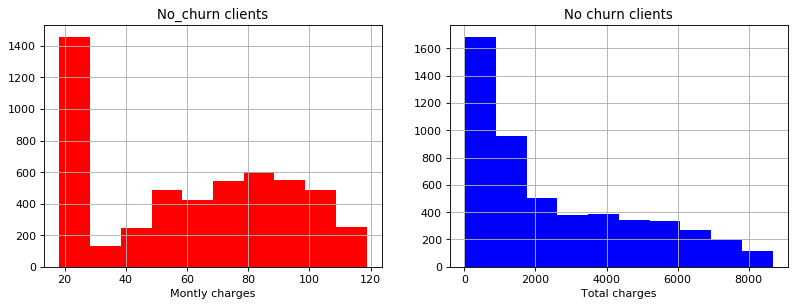

In [115]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.hist(x = nochurn['MonthlyCharges'], color = 'r', label = '')
plt.xlabel('Montly charges')
plt.title('No_churn clients')
plt.grid()


plt.subplot(1, 2, 2)
plt.hist(x = nochurn['TotalCharges'], color = 'b')
plt.xlabel('Total charges')
plt.title('No churn clients')
plt.grid()

plt.show()




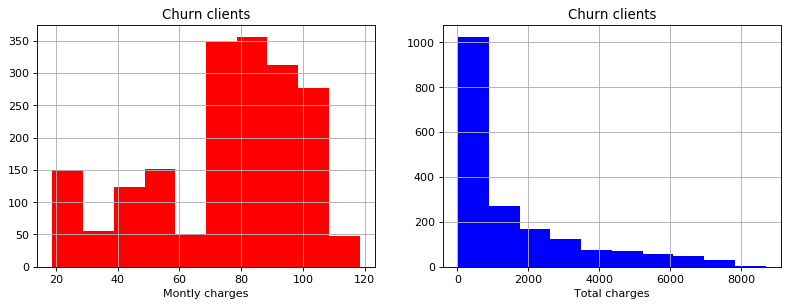

In [116]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.hist(x = churn['MonthlyCharges'], color = 'r', label = '')
plt.xlabel('Montly charges')
plt.title('Churn clients')
plt.grid()


plt.subplot(1, 2, 2)
plt.hist(x = churn['TotalCharges'], color = 'b')
plt.xlabel('Total charges')
plt.title('Churn clients')
plt.grid()

plt.show()



# Вывод

Не нашлось Nan значение и дубликатов. Из гистограм возможно сформулировать гипотез о том  что чаше уходят кллиенты у которых месечная оплата больше 60 у.е, при этом у общая оплата ниже 2000у.е. Что говорит о том что не долго они задерживаются и решают уходит.

# План

- <a>1. Чтение файлов с данными и изучение общей информаций.</a>
- <a>2. Обработка данных. Поиск пропущеных, nan значений и дубликатов. Замена значений на медианы или на средное значение. Слияание датафрэимов</a>
- <a>3. Исследовательский анализ данных. Построение графиков  признаков и ухода клиентов.  </a>
- <a>4. Предварительная обработка данных для обучение моделей. Создание численых признаков и производных признаков от существующих.  </a>
- <a>5. Построение моделей. Подборка гиперпараметров и выбор наилучше модель </a>
- <a>6. Вырвод результатов  </a>

# Вопросы

- <a>1. У нас больше информация о клиентах чам о услуги предоставлены. Что делать с клиентами у которых нет информаций в датафржим internet и phone.?</a>
- <a>2. Что означает признаки : SeniorCitizen, Partner и Dependents в файле personal?</a>
- <a>3. Целособрасно ли создать один большой датафрэйм из всех файлов и заполнять каким-то значением пропушеных наблюдений? если да то каким? </a>

